In [17]:
import pandas_datareader.data as web # to collect data
import datetime as dt #to specify start and end dates
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style

In [18]:
style.use('ggplot')

In [19]:
start = dt.datetime(2024, 1, 1)
end = dt.datetime(2024, 12, 16)
tickers = ['GOOG', 'AMZN', 'AAPL']
cc = 'BTC-USD'

In [20]:
for ticker in tickers:
  data = yf.download(ticker, start=start, end=end)
  data.to_csv('{}.csv'.format(ticker))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
print(data.columns)

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [27]:
data = yf.download(cc, start=start, end=end)
print(data.head(3))
print(data.tail(3))

[*********************100%***********************]  1 of 1 completed

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-01-01  44167.332031  44167.332031  44175.437500  42214.976562   
2024-01-02  44957.968750  44957.968750  45899.707031  44176.949219   
2024-01-03  42848.175781  42848.175781  45503.242188  40813.535156   

Price               Open       Volume  
Ticker           BTC-USD      BTC-USD  
Date                                   
2024-01-01  42280.234375  18426978443  
2024-01-02  44187.140625  39335274536  
2024-01-03  44961.601562  46342323118  
Price           Adj Close          Close           High            Low  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2024-12-13  101459.257812  101459.257812  101888.804688   99233.281250   
2024-12-14  101372.968750  101372.968750  1

Visualizing Cryptocurrency Data

In [23]:
from google.colab import output
output.disable_custom_widget_manager()

In [32]:
data = pd.read_csv('/content/AMZN.csv', skiprows=2)  # Skip first two rows for now

# Rename columns with appropriate labels
data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Verify cleaned data
print(data.head())
print(data.columns)


             Adj Close       Close        High         Low        Open  \
Date                                                                     
2024-01-02  149.929993  149.929993  152.380005  148.389999  151.539993   
2024-01-03  148.470001  148.470001  151.050003  148.330002  149.199997   
2024-01-04  144.570007  144.570007  147.380005  144.050003  145.589996   
2024-01-05  145.240005  145.240005  146.589996  144.529999  144.690002   
2024-01-08  149.100006  149.100006  149.399994  146.149994  146.740005   

              Volume  
Date                  
2024-01-02  47339400  
2024-01-03  49425500  
2024-01-04  56039800  
2024-01-05  45124800  
2024-01-08  46757100  
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


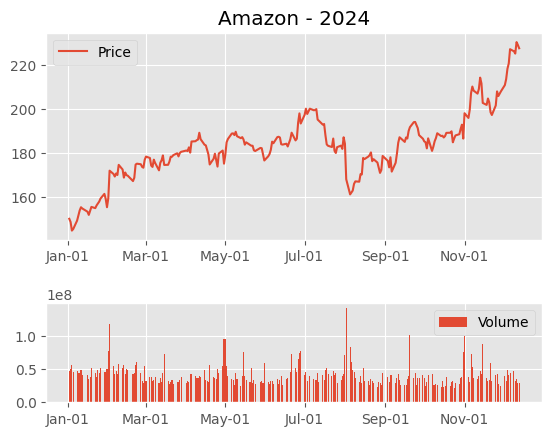

In [25]:
%matplotlib inline
ax1 = plt.subplot2grid((7, 1), (0, 0), rowspan = 4,
                       colspan = 1, title = 'Amazon - 2024')
ax2 = plt.subplot2grid((7, 1), (5, 0), rowspan = 2,
                       colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax2.bar(data.index, data['Volume'], label = 'Volume')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax1.legend()
ax2.legend()
plt.savefig('Amazon-2024.png')
plt.show()